This notebook will concern some exploratory data analysis with the dataset (investigating), below are some of the things to look at:
- counts for each genre
- counts for each year
- counts for each genre for every year
- correlation between features for each genre (like danceability or valence or whatever)
- average of some numeric features per genre

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<br>

In [18]:
# Load the JSON file back into a DataFrame
dataset = pd.read_json('data/cured_dataset.json', lines=True)

In [146]:
dataset.columns

Index(['id', 'genres', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'name',
       'popularity', 'release_date', 'artists_names', 'images_url',
       'no_of_sections', 'tempo_confidence', 'mode_confidence',
       'key_confidence'],
      dtype='object')

In [19]:
dataset.head()

,id,genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,time_signature,name,popularity,release_date,artists_names,images_url,no_of_sections,tempo_confidence,mode_confidence,key_confidence
0,2Vc6NJ9PW9gD9q343XFRKx,"[Underground Rap, Dark Trap, Hiphop]",0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,...,4,Mercury: Retrograde,2,2017-09-05,[Ghostemane],https://i.scdn.co/image/ab67616d0000b27347fa48...,8,0.307,0.543,0.506
1,7pgJBLVz5VmnL7uGHmRj6p,[Dark Trap],0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,...,4,Pathology,37,2020-11-20,"[Don Kenobi, SkyDxddy]",https://i.scdn.co/image/ab67616d0000b27391b3f8...,11,0.343,0.542,0.414
2,0vSWgAlfpye0WCGeNmuNhy,[Dark Trap],0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,...,4,Symbiote,23,2018-03-05,[gizmo],https://i.scdn.co/image/ab67616d0000b2731981f3...,4,0.636,0.346,0.198
3,0VSXnJqQkwuH2ei1nOQ1nu,"[Hiphop, Dark Trap]",0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,...,3,ProductOfDrugs (Prod. The Virus and Antidote),0,2016-09-15,"[Kamiyada+, The Virus and Antidote]",https://i.scdn.co/image/ab67616d0000b273e9923e...,3,0.000,0.745,0.765
4,4jCeguq9rMTlbMmPHuO7S3,"[Trap Metal, Underground Rap, Dark Trap]",0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,...,4,Venom,0,2017-05-25,"[$uicideboy$, Shakewell]",https://i.scdn.co/image/ab67616d0000b2737811bf...,5,0.205,0.631,0.694


## Genre Distribution

In [22]:
# Explode the 'genres' column to create separate rows for each genre
exploded_df = dataset.explode('genres')

# Count the occurrences of each genre
genre_counts = exploded_df['genres'].value_counts()
genre_counts

Underground Rap    5874
Dark Trap          4522
Hiphop             3004
trance             2805
psytrance          2650
techno             2646
dnb                2507
trap               2359
hardstyle          2351
techhouse          2239
RnB                2097
Trap Metal         1947
Rap                1833
Emo                1679
Pop                 461
Name: genres, dtype: int64

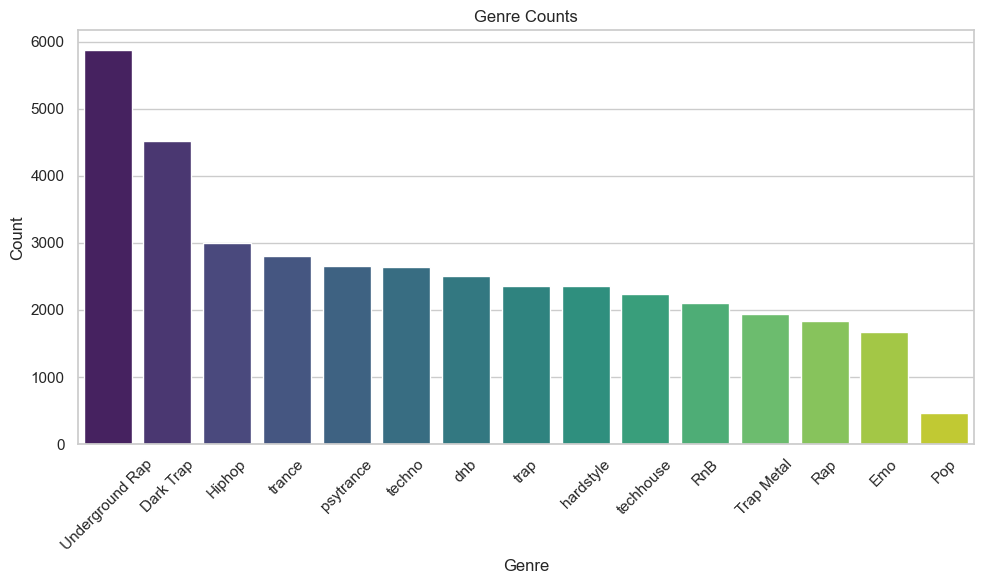

In [33]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Insight:** <br>
 - Pop is very little compared to the rest of the other genres
 - Underground Rap and Dark Trap are dominating this distribution

## Year Distribution

In [65]:
years = pd.Series(dataset['release_date'].apply(lambda x: x[:4]))
year_counts = years.value_counts()

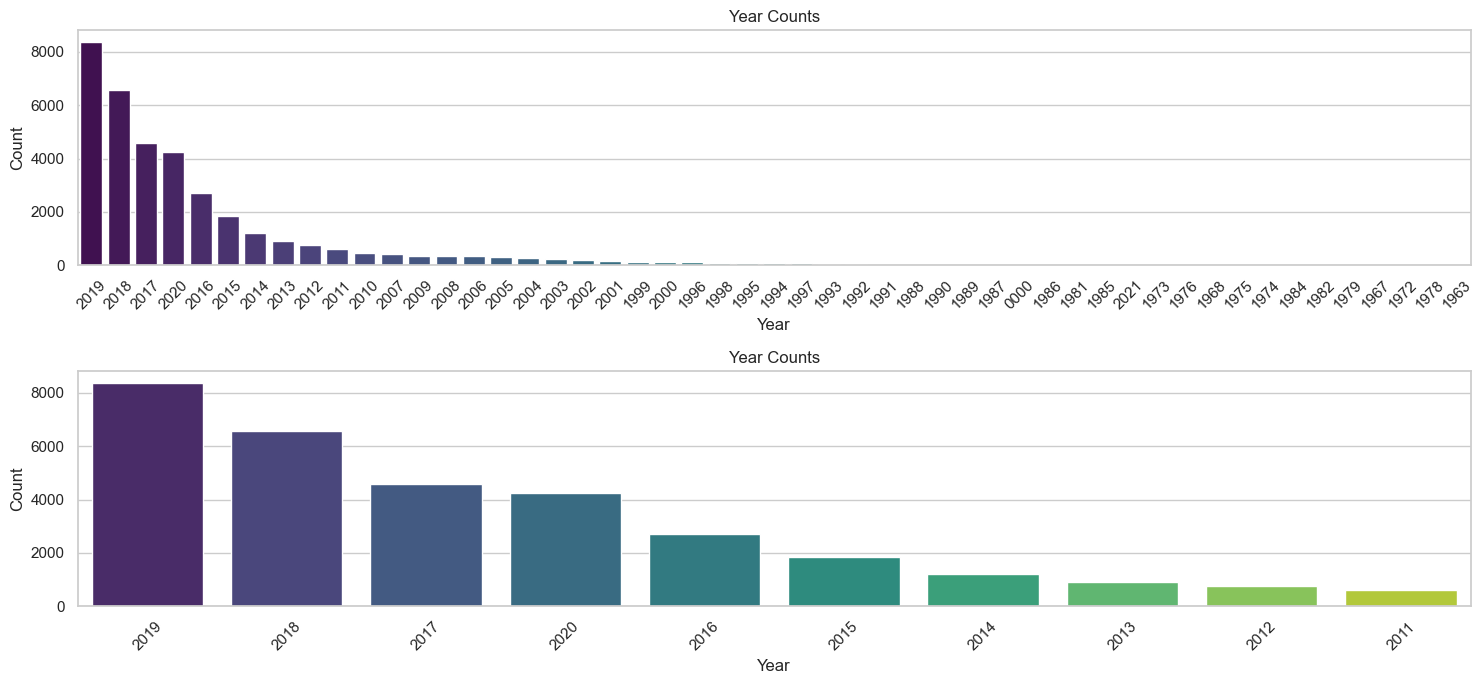

In [64]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a bar plot
fig, axs = plt.subplots(2, 1, figsize=(15, 7))

plt.subplot(211)
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(212)
sns.barplot(x=year_counts[:10].index, y=year_counts[:10].values, palette='viridis')
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()

**Insight:** <br>
- Recent years dominate that distribution
- You can see there is a general trend of increasingly more songs being acquired by the year

## Genre Count per recent years

In [92]:
exploded_df['year'] = exploded_df['release_date'].apply(lambda x: x[:4])

In [93]:
genre_counts_by_year = exploded_df.groupby(['year', 'genres']).size().reset_index(name='count')

In [95]:
# Calculate the top 10 years based on genre counts
top_years = genre_counts_by_year.groupby('year')['count'].sum().nlargest(10).index

In [101]:
genre_counts_top10 = genre_counts_by_year[genre_counts_by_year['year'].isin(top_years)]

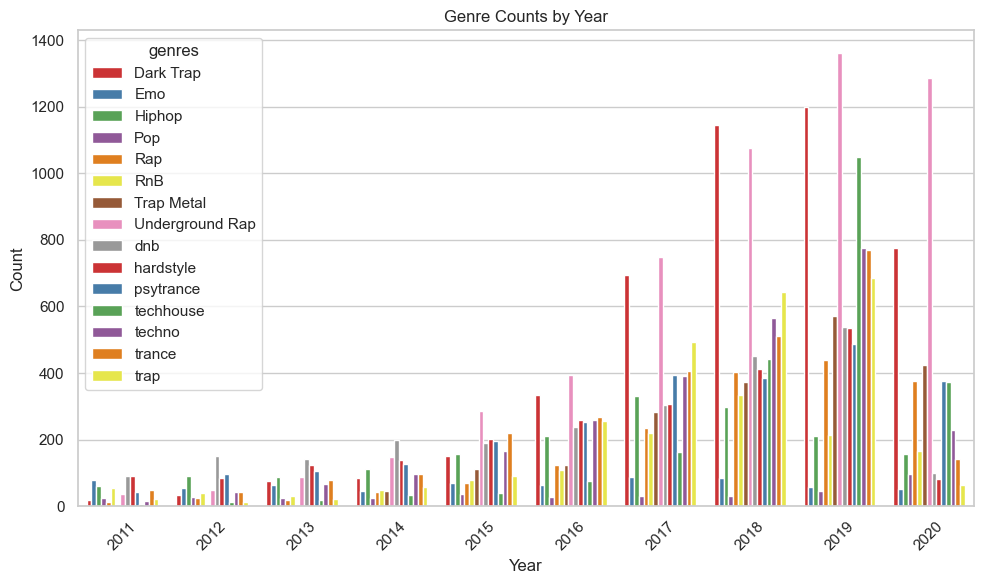

In [105]:

# Set Seaborn style
sns.set(style='whitegrid')

custom_palette = sns.color_palette('Set1', n_colors=len(exploded_df['genres'].unique()))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='count', hue='genres', data=genre_counts_top10, palette=custom_palette)
plt.title('Genre Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Insight:** <br>
- Hiphop was extracted alot in 2019
- there was a rise in the extraction of underground rap and dark trap by the years, possibly because the dark trap was only recently common

## Average Number of Sections per Genre

In [137]:
# Group by 'genres' and calculate the average number of sections
average_sections_per_genre = exploded_df.groupby('genres')['no_of_sections'].agg(['mean', 'std'])

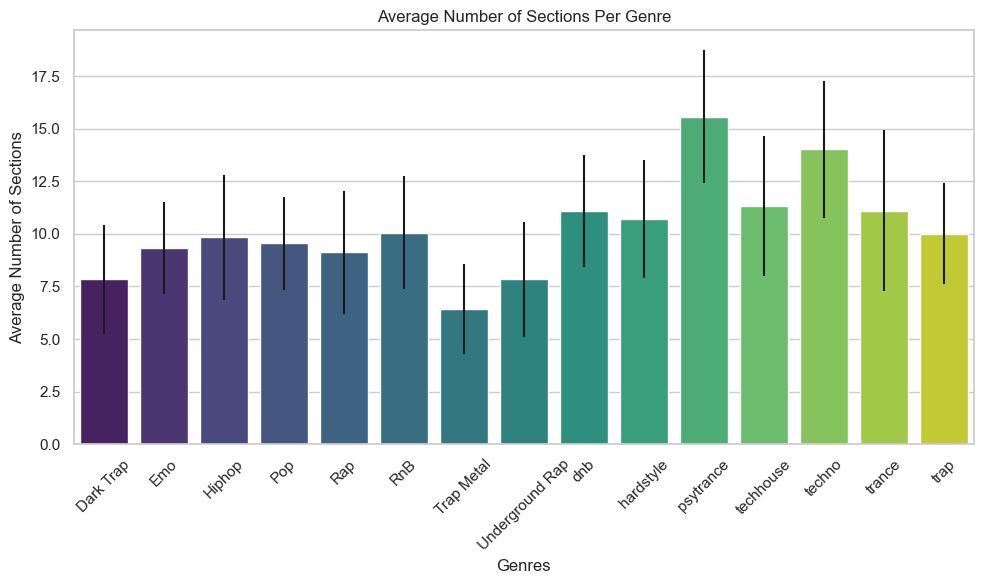

In [139]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a bar plot
fig, axs = plt.subplots(4, 1, figsize=(15, 7))

sns.barplot(x=average_sections_per_genre.index, y=average_sections_per_genre['mean'].values,
            yerr=average_sections_per_genre['std'].values, palette='viridis')
plt.title('Average Number of Sections Per Genre')
plt.xlabel('Genres')
plt.ylabel('Average Number of Sections')
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()

**Insight:** <br>
- Trap Metal has generally the lowest average number of sections in a song
- Psytrance has the most
- The error bars are significant enough to see that it does vary sometimes (e.g. a trap metal song can have more sections a dark trap song or a pop song). But not too much (e.g. Wont have more sections than a techno or a psytrance song)

## Some Numerical Features per Genre

In [148]:
average_speechiness_per_genre = exploded_df.groupby('genres')['speechiness'].mean()
average_valence_per_genre = exploded_df.groupby('genres')['valence'].mean()
average_loudness_per_genre = exploded_df.groupby('genres')['loudness'].mean()

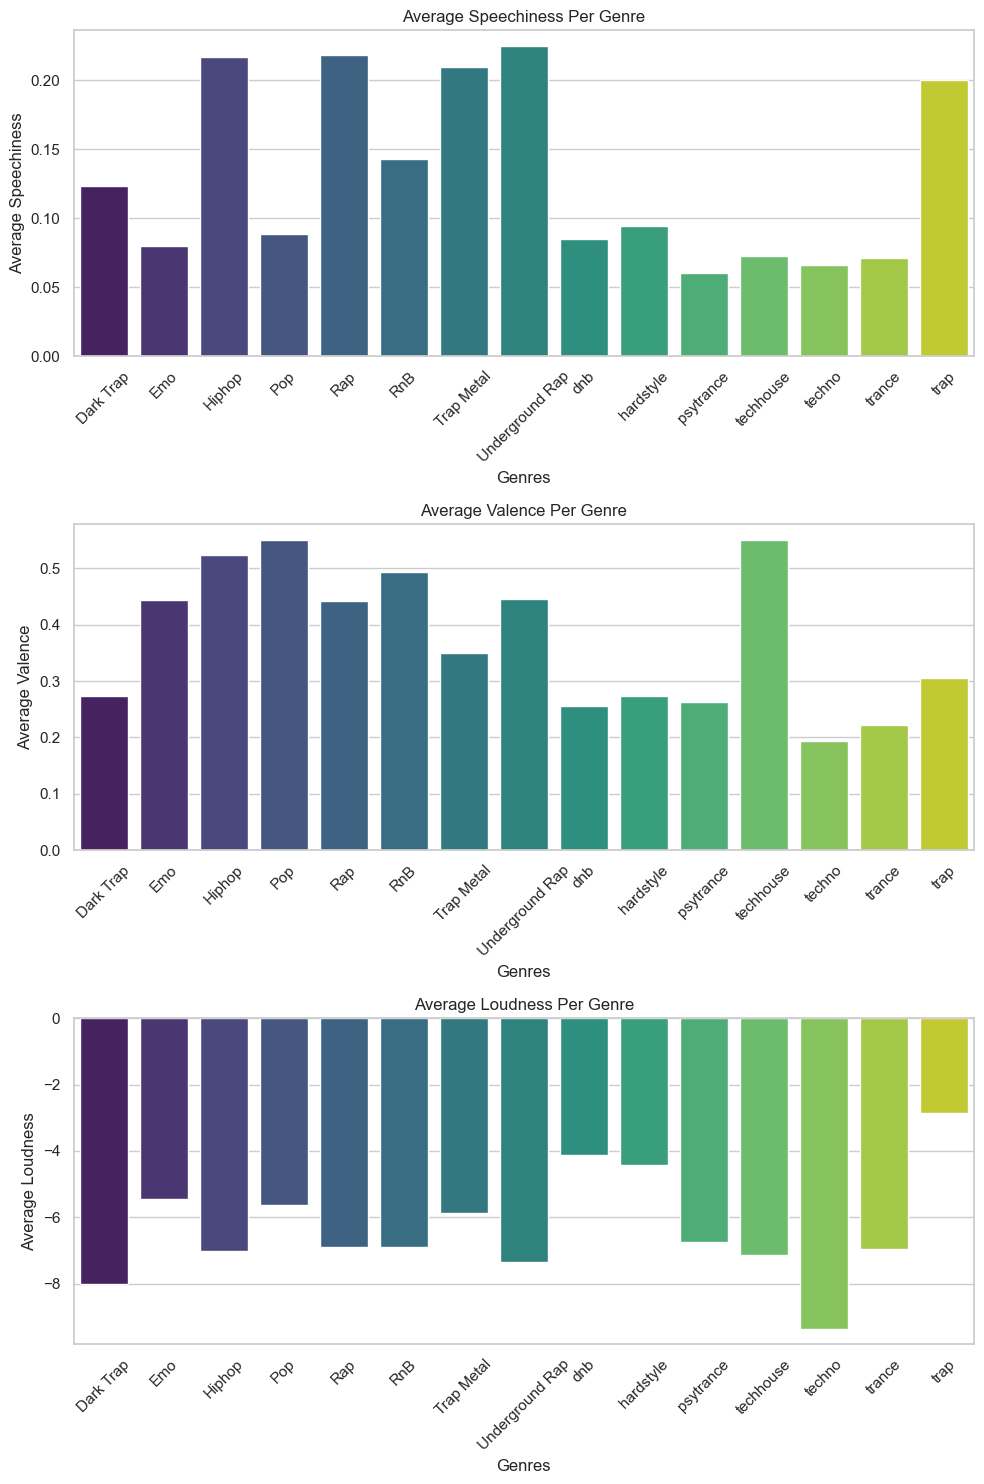

In [153]:

# Set Seaborn style
sns.set(style='whitegrid')

# Create barplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
plt.subplot(311)
sns.barplot(x=average_speechiness_per_genre.index, y=average_speechiness_per_genre.values, palette='viridis')
plt.title('Average Speechiness Per Genre')
plt.xlabel('Genres')
plt.ylabel('Average Speechiness')
plt.xticks(rotation=45)
plt.tight_layout()


plt.subplot(312)
sns.barplot(x=average_valence_per_genre.index, y=average_valence_per_genre.values, palette='viridis')
plt.title('Average Valence Per Genre')
plt.xlabel('Genres')
plt.ylabel('Average Valence')
plt.xticks(rotation=45)
plt.tight_layout()


plt.subplot(313)
sns.barplot(x=average_loudness_per_genre.index, y=average_loudness_per_genre.values, palette='viridis')
plt.title('Average Loudness Per Genre')
plt.xlabel('Genres')
plt.ylabel('Average Loudness')
plt.xticks(rotation=45)
plt.tight_layout()




# Show the plot
plt.show()

**Insight:**<br>
- As expected, HipHop,Rap,Trap songs have the most Speechiness whilst dnb, techno have the lowest
- Also as expected, pop and technohouse generally have the highest valence, which is the musical positiveness conveyed by a track
- It can be seen that trap generally is the loudest genre here

## Correlations of variables per genre

In [175]:
genre_grouped['genres'].unique()

genres
Dark Trap                [Dark Trap]
Emo                            [Emo]
Hiphop                      [Hiphop]
Pop                            [Pop]
Rap                            [Rap]
RnB                            [RnB]
Trap Metal              [Trap Metal]
Underground Rap    [Underground Rap]
dnb                            [dnb]
hardstyle                [hardstyle]
psytrance                [psytrance]
techhouse                [techhouse]
techno                      [techno]
trance                      [trance]
trap                          [trap]
Name: genres, dtype: object

In [188]:
def visualize_correlation_matrix(genre, data):
    
    numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness','liveness', 'valence', 'tempo',
                  'duration_ms', 'popularity', 'no_of_sections', ]
    
    genre_data = data[data['genres'] == genre]
    correlation_matrix = genre_data[numeric_columns].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Matrix for {genre}')
    plt.tight_layout()
    plt.show()

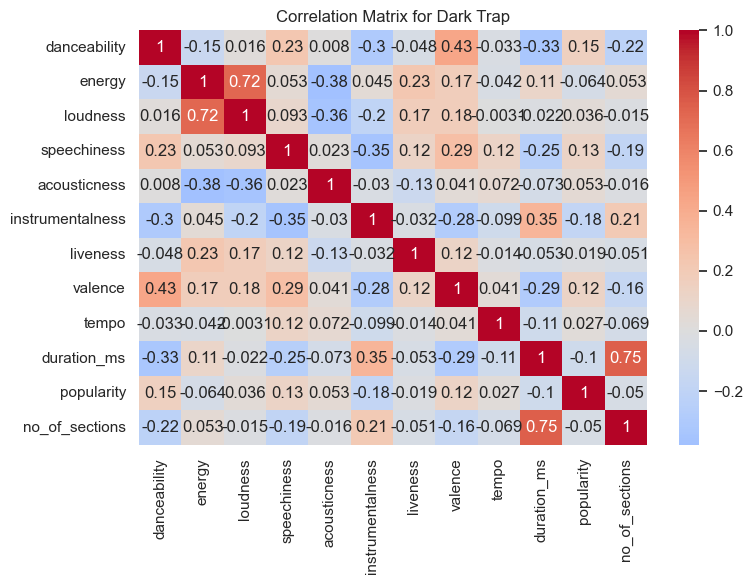

In [189]:
visualize_correlation_matrix('Dark Trap', exploded_df)

**Insight:**
- Loudness is correlated to the energy in a dark trap song
- for a dark trap song the positveness of the song slightly correlates to its danceability
- the energy and the loudness slightly negatively correlates to the acousticness
- instrumentalness correlates to the duration of the song (perhaps more chance of an outro)

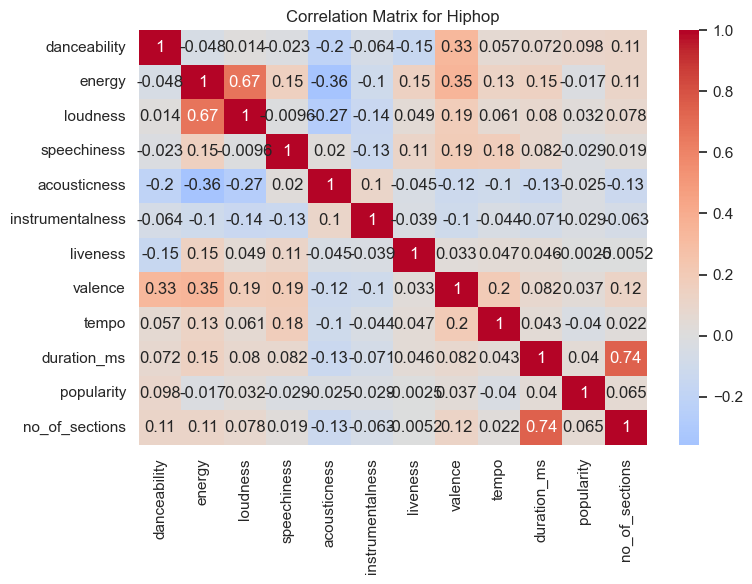

In [190]:
visualize_correlation_matrix('Hiphop', exploded_df)

**Insight:**
- Similar to dark trap a little bit in the map
- However, valence here correlates to the energy more than dark trap, which explains why energetic songs are generally more braggadocious in hiphop

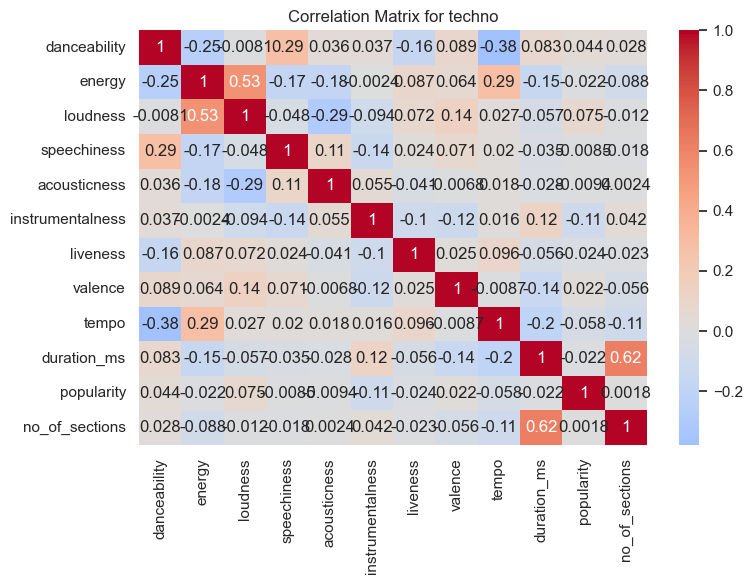

In [191]:
visualize_correlation_matrix('techno', exploded_df)

**Insight:**
- Very different heatmap here for techno than hiphop and trap
- danceability negatively correlates to the tempo of the song

**Insight:**

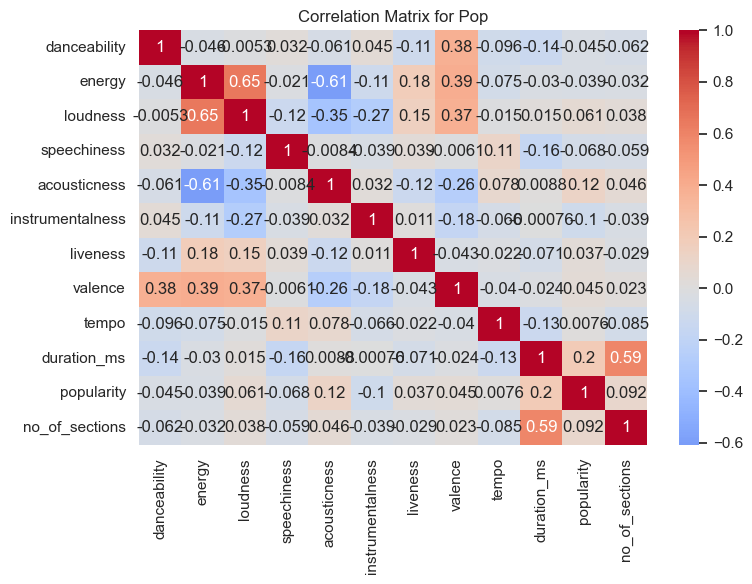

In [193]:
visualize_correlation_matrix('Pop', exploded_df)

**Insight:**
- Different looking heatmap here
- energy here negatively correlates to the acousticness, which could make sense, because in pop songs, more acoustic oriented normally calm songs.
- loudness is the same case with acoustiness too
- valence here correlates with energy danceability and loudness
- but negatively correlates with acoustiness, as generally the acoustic pop songs are sadder ish, (usually an acoustic sad guitar song)

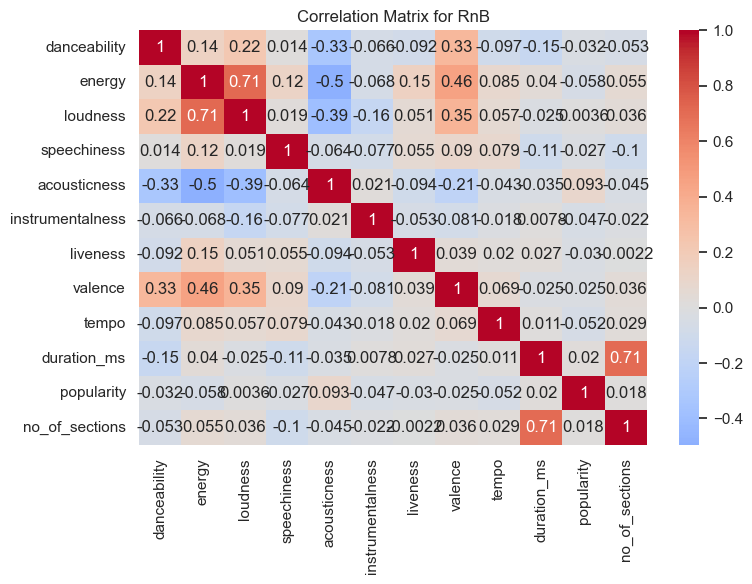

In [194]:
visualize_correlation_matrix('RnB', exploded_df)

**Insight:**
- similar looking heatmap to pop 
- except that here danceability also negatively correlates to the acoustiness

### **Overall Insight:**

- heatmap looks somewhat as expected for different genres
- energy and loudness are universally correlated